# Exploratory Data Analysis of B-Cell Data

In this notebook we features and structure of B-cell data from the Dana Pe'er Lab of Computational Systems Biology. As part of their experiments, Pe’er et.al collected a B cell centric, mass cytometry dataset from human bone marrow. Their dataset includes records of multiple B cell cellular features, such as activation of regulatory sig-naling molecules, and phenotypic proteins.  We will be using their publicly available data of mass cytometry and scRNA-seq. 

For more information about the Dana Pe'er Lab and their Wanderlust algorithm: https://dpeerlab.github.io/dpeerlab-website/wanderlust.html

Their publicly available B cell data: https://dpeerlab.github.io/dpeerlab-website/wanderlust-data.html

## Analyzing Flow Cytometry Data

In [1]:
# data management
import numpy as np
import pandas as pd

# flow cytometry libraries
import FlowCytometryTools
import FlowCal
import cytoflow as flow

Load in the b-cell data.

In [2]:
marrow_basal_file = '../data/B_cell_data/Marrow1_01_Basal1.fcs'
marrow_bcr_file   = '../data/B_cell_data/Marrow1_06_BCR.fcs'

# using the cytoflow package
basal_tube = flow.Tube(file = marrow_basal_file,
                  conditions = {'bcr' : 0.0})
bcr_tube   = flow.Tube(file=marrow_bcr_file,
                  conditions = {'bcr' : 1.0})

import_op = flow.ImportOp(conditions = {'bcr' : 'float'},
                          tubes = [basal_tube, bcr_tube])


ex = import_op.apply()
print("Channels in this experiment: \n", ex.channels)

Channels in this experiment: 
 ['103-Viability', '110-CD3', '110_114-CD3', '111-CD3', '112-CD3', '114-CD3', '115-CD45', '139-CD45RA', '141-pPLCgamma2', '142-CD19', '144-CD11b', '145-CD4', '146-CD8', '147-CD20', '148-CD34', '150-pSTAT5', '151-pERK1/2', '152-Ki67', '153-pMAPKAPK2', '154-pSHP2', '156-pZAP70/Syk', '158-CD33', '159-pSTAT3', '160-CD123', '164-pSLP-76', '165-pNFkB', '166-IkBalpha', '167-CD38', '168-pH3', '169-pP38', '170-CD90', '171-pBtk/Itk', '172-pS6', '174-pSrcFK', '175-pCrkL', '176-pCREB', '191-DNA', '193-DNA', 'Cell Length', 'EventNum', 'Time']


Plot a channel on a histogram. 

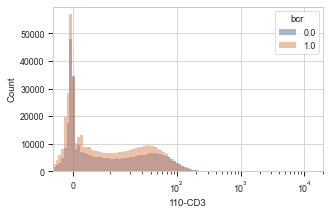

In [3]:
channel = '110-CD3'
hist = flow.HistogramView(channel = channel,
                          scale = 'logicle',
                          huefacet = 'bcr')
hist.plot(ex)

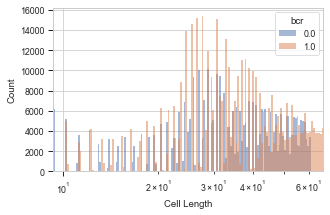

In [4]:
channel = 'Cell Length'
hist = flow.HistogramView(channel = channel,
                          scale = 'log',
                          huefacet = 'bcr')
hist.plot(ex)

## EDA

In [5]:
df = ex.data.copy()
df.head()

,103-Viability,110-CD3,110_114-CD3,111-CD3,112-CD3,114-CD3,115-CD45,139-CD45RA,141-pPLCgamma2,142-CD19,...,172-pS6,174-pSrcFK,175-pCrkL,176-pCREB,191-DNA,193-DNA,Cell Length,EventNum,Time,bcr
0,13.887588,45.619759,286.148224,33.936417,82.887451,102.236412,629.291260,111.086143,7.303391,116.630058,...,28.160339,42.226711,4.575513,14.610126,1467.694214,2652.224609,25.911442,1.0,5.0,0.0
1,7.953281,21.776331,162.107315,30.032499,51.942520,45.778927,465.365601,129.546188,9.622845,100.531303,...,9.575835,12.174552,3.819733,11.121452,1368.573486,2583.839844,32.389301,2.0,5.0,0.0
2,75.394386,-0.387244,4.361003,4.165413,-0.479078,0.530701,-2.788799,2.249059,10.519377,-0.107634,...,51.996456,8.899544,3.067984,6.971109,1069.697510,1955.083740,55.524521,3.0,8.0,0.0
3,44.809139,-1.397486,-0.166676,-3.483190,6.152699,-1.002166,268.233856,2.261043,-0.581778,-1.063074,...,-1.128529,75.601952,-2.499973,31.174557,783.372192,1189.282715,43.494209,4.0,12.0,0.0
4,80.057510,23.398191,154.321350,21.928640,38.587242,58.580956,37.195732,0.398052,2.439066,-1.307640,...,29.500183,136.892334,22.396849,13.471563,2712.169678,4481.430176,51.822887,5.0,19.0,0.0


In [6]:
# Data split: 
print('Basal Percentage: %.3f' % (len(df[df['bcr'] == 0]) / len(df)))
print('BCR Percentage: %.3f' % (len(df[df['bcr'] == 1]) / len(df)))
print('total samples', len(df))

Basal Percentage: 0.427
BCR Percentage: 0.573
total samples 823701


## Running simple logistic regression 

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop(['bcr', 'Cell Length', 'EventNum', 'Time'], axis=1)
y = df['bcr']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear').fit(X_train[:50000], y_train[:50000])
lr.score(X_test, y_test)

/Users/Mike/anaconda3/envs/ml-genomics/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


0.821605819566252